# Sorting the eigenvalues of HO subject to B

The eigenvalues of a 2D harmonic oscillator under the influence of a B-field is given by
$$
\epsilon_{nm} = \hbar \Omega (2n + |m| + 1) - \frac{\hbar\omega_c}{2} m
$$
Importantly,
$\Omega^2 = \omega_0^2 + \omega_c^2/4$
We are teenagers, so setting $\omega_0 = \hbar = 1$, while $\omega_c$ is dependent on the B-field. 

The eigenfunctions are
$$
 \psi_{nm}(r,\theta) = a e^{im\theta}\sqrt{\frac{n!}{\pi\left(n + |m| \right)!}}\left(ar\right)^{|m|}L_{n}^{|m|}\left(a^2r^2 \right)e^{-(a^2r^2)/2}
$$
This is from project 1, FYS-KJM9480, høst 2015. Here $a=\sqrt{m_e\omega_0/\hbar}$. With the B-field we use $\Omega$ instead of $\omega_0$.

Compute integrals by substitution, $ar\to x$. Then we should be able to compute the coulomb-elements in the manner of Anisimovas and only multipy with some "scaling factor" $\omega_0$ or $\Omega$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from quantum_systems.quantum_dots.two_dim.coulomb_elements import coulomb_ho

In [3]:
def get_shell_energy(n, m, omega_c=0, omega_0=1):
    omega = np.sqrt(omega_0*omega_0 + omega_c*omega_c/4)
    return omega*(2*n + abs(m) + 1) - (omega_c * m)/2

In [4]:
def construct_dataframe(ns, ms, omega_c):
    
    df = pd.DataFrame()
    i = 0
    for n_ in ns:
        for m_ in ms:
            df.loc[i, "n"] = n_
            df.loc[i, "m"] = m_
            df.loc[i, "E"] = get_shell_energy(n_, m_, omega_c)
            i += 1
    
    df = df.sort_values("E").reset_index().drop("index", axis=1)
    
    df["level"] = 0
    energies = df["E"].round(decimals=8).unique()
    
    for i, energy in enumerate(energies):
        energy_position = np.where(np.abs(df["E"] - energy) < 1e-6)[0]
        df.loc[energy_position, "level"] = i
        
    min_num_states = len(ns)*(len(ns) - 1) // 2
    level_of_orbital_cap = df.iloc[min_num_states]["level"]
    while df.iloc[min_num_states]["level"] == level_of_orbital_cap:
        min_num_states += 1
    
    return df.iloc[:min_num_states]

In [5]:
num_orbitals = 7
ns = np.arange(num_orbitals)
ms = np.arange(-num_orbitals, num_orbitals+1)
df = construct_dataframe(ns, ms, omega_c = 1/np.sqrt(2))

In [9]:
df["m"].astype(int)

0     0
1     1
2    -1
3     2
4     0
5     3
6     1
7     4
8    -2
9     2
10   -1
11    5
12    0
13   -3
14    6
15    3
16   -2
17    4
18    7
19    1
20    5
21   -4
22    2
23   -1
Name: m, dtype: int64

In [21]:
df.iloc[:min_num_states]

,n,m,E,level
0,0.0,0.0,1.060660,0
1,0.0,1.0,1.767767,1
2,0.0,-1.0,2.474874,2
3,0.0,2.0,2.474874,2
4,0.0,3.0,3.181981,3
5,1.0,0.0,3.181981,3
6,1.0,1.0,3.889087,4
7,0.0,4.0,3.889087,4
8,0.0,-2.0,3.889087,4
9,0.0,5.0,4.596194,5


In [5]:
def get_one_body_elements(num_orbitals, dtype=np.float64, df=None, omega_c=0):
    
    if df == None:
        # Just make it the frick large enough. Note very elegant.
        ns = np.arange(num_orbitals)
        ms = np.arange(-num_orbitals, num_orbitals+1)
        df = construct_dataframe(ns, ms, omega_c=omega_c)
        
    h = np.zeros((num_orbitals, num_orbitals), dtype=dtype)
    
    for p in range(num_orbitals):
        h[p, p] = df.loc[p, "E"]

In [6]:
def get_coulomb_elements(num_orbitals, dtype=np.float64, df=None, omega_c=0):
    
    if df == None:
        # Just make it the frick large enough
        ns = np.arange(num_orbitals)
        ms = np.arange(-num_orbitals, num_orbitals+1)
        df = construct_dataframe(ns, ms, omega_c=omega_c)
    
    shape = tuple([num_orbitals]*4)
    u = np.zeros(shape, dtype=dtype)
    
    for p in range(num_orbitals):
        n_p, m_p = df.loc[p, ["n", "m"]].values
        for q in range(num_orbitals):
            n_q, m_q = df.loc[q, ["n", "m"]].values
            for r in range(num_orbitals):
                n_r, m_r = df.loc[r, ["n", "m"]].values
                for s in range(num_orbitals):
                    n_s, m_s = df.loc[s, ["n", "m"]].values
                    
                    u[p, q, r, s] = coulomb_ho(
                        n_p, m_p, n_q, m_q, n_r, m_r, n_s, m_s
                    )
    return u

In [7]:
# Try to reproduce spaghetti plot
omega_c = np.linspace(0, 4, 101)
ns = np.arange(5)
ms = np.arange(-5, 6)

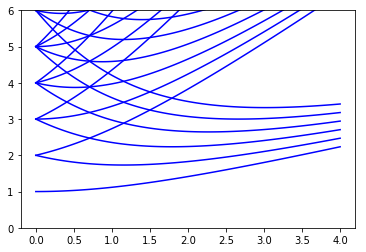

In [8]:
plt.figure()
plt.ylim((0, 6))
for n in ns:
    for m in ms:
        energy = get_shell_energy(n, m, omega_c)
        plt.plot(omega_c, energy, "b")
plt.show()